In [6]:
import heapq
import random
import time
import numpy as np

# ---------- A* SEARCH ----------
def astar(grid, start, goal):
    rows, cols = grid.shape
    pq = []
    heapq.heappush(pq, (0, start))
    came_from = {}
    g = {start: 0}

    def h(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    while pq:
        _, current = heapq.heappop(pq)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
            nx, ny = current[0] + dx, current[1] + dy
            if 0 <= nx < rows and 0 <= ny < cols and grid[nx][ny] == 0:
                nxt = (nx, ny)
                new_cost = g[current] + 1
                if nxt not in g or new_cost < g[nxt]:
                    g[nxt] = new_cost
                    f = new_cost + h(nxt, goal)
                    heapq.heappush(pq, (f, nxt))
                    came_from[nxt] = current
    return None


# ---------- DYNAMIC ENV ----------
def update_env(grid, p=0.05):
    rows, cols = grid.shape
    for _ in range(int(rows * cols * p)):
        x, y = random.randint(0, rows-1), random.randint(0, cols-1)
        if (x, y) not in [(0,0),(rows-1, cols-1)]:
            grid[x][y] = 1 - grid[x][y]
    return grid


# ---------- ADAPTIVE AGENT ----------
def adaptive_agent(grid):
    start = (0,0)
    goal = (grid.shape[0]-1, grid.shape[1]-1)
    cur = start
    path_len = 0
    replans = 0
    t0 = time.time()

    while cur != goal:
        path = astar(grid, cur, goal)
        if path is None:
            return False, path_len, replans, time.time() - t0

        for step in path:
            grid = update_env(grid)
            if grid[step[0]][step[1]] == 1:
                replans += 1
                break
            cur = step
            path_len += 1
            if cur == goal:
                return True, path_len, replans, time.time() - t0

    return True, path_len, replans, time.time() - t0


# ---------- RUN EXACT 50 ----------
def run_50():
    success = 0

    for i in range(1, 51):
        grid = np.zeros((10,10), dtype=int)

        for _ in range(20):
            x, y = random.randint(0,9), random.randint(0,9)
            if (x,y) not in [(0,0),(9,9)]:
                grid[x][y] = 1

        ok, length, replans, t = adaptive_agent(grid)

        if ok:
            success += 1

        print(f"Scenario {i}")
        print(f"Result        : {'SUCCESS' if ok else 'FAILED'}")
        print(f"Path Length   : {length}")
        print(f"Replans       : {replans}")
        print(f"Time (sec)    : {t:.4f}")
        print(f"Success Ratio : {(success/i)*100:.2f}%")
        print("-"*30)

    print("FINAL RESULT")
    print(f"Total     : 50")
    print(f"Success   : {success}")
    print(f"Ratio     : {(success/50)*100:.2f}%")


run_50()


Scenario 1
Result        : FAILED
Path Length   : 6
Replans       : 1
Time (sec)    : 0.0012
Success Ratio : 0.00%
------------------------------
Scenario 2
Result        : FAILED
Path Length   : 7
Replans       : 1
Time (sec)    : 0.0012
Success Ratio : 0.00%
------------------------------
Scenario 3
Result        : FAILED
Path Length   : 6
Replans       : 2
Time (sec)    : 0.0015
Success Ratio : 0.00%
------------------------------
Scenario 4
Result        : FAILED
Path Length   : 7
Replans       : 1
Time (sec)    : 0.0009
Success Ratio : 0.00%
------------------------------
Scenario 5
Result        : SUCCESS
Path Length   : 18
Replans       : 0
Time (sec)    : 0.0009
Success Ratio : 20.00%
------------------------------
Scenario 6
Result        : FAILED
Path Length   : 6
Replans       : 2
Time (sec)    : 0.0009
Success Ratio : 16.67%
------------------------------
Scenario 7
Result        : FAILED
Path Length   : 3
Replans       : 1
Time (sec)    : 0.0007
Success Ratio : 14.29%
----

In [1]:
# Mini Expert System for Cybersecurity Threat Diagnosis
# Forward chaining rule-based system

class ExpertSystem:
    def __init__(self):
        # Knowledge base: rules
        self.rules = [
            {"conditions": ["high_traffic", "no_user_activity"], "diagnosis": "DDoS"},
            {"conditions": ["suspicious_ports", "repeated_connection_attempts"], "diagnosis": "Port Scan"},
            {"conditions": ["malware_signature_detected"], "diagnosis": "Malware Infection"},
            {"conditions": ["phishing_emails_detected"], "diagnosis": "Phishing Attack"},
            {"conditions": ["unauthorized_access", "privilege_escalation"], "diagnosis": "Intrusion"}
        ]
        self.trace = []

    def ask_user(self, fact):
        ans = input(f"Is '{fact}' observed? (yes/no): ").strip().lower()
        return ans == "yes"

    def diagnose(self, facts=None, interactive=False):
        self.trace.clear()
        if facts is None:
            facts = []

        # If interactive, ask user for missing facts
        if interactive:
            all_possible_facts = {c for rule in self.rules for c in rule["conditions"]}
            for fact in all_possible_facts:
                if fact not in facts:
                    if self.ask_user(fact):
                        facts.append(fact)

        # Forward chaining: check rules
        for rule in self.rules:
            if all(cond in facts for cond in rule["conditions"]):
                self.trace.append(f"Rule fired: IF {' AND '.join(rule['conditions'])} THEN {rule['diagnosis']}")
                return rule["diagnosis"]

        self.trace.append("No matching rule found.")
        return "Unknown Threat"

# -----------------------------
# Testing on 10 scenarios
# -----------------------------
scenarios = [
    (["high_traffic", "no_user_activity"], "DDoS"),
    (["suspicious_ports", "repeated_connection_attempts"], "Port Scan"),
    (["malware_signature_detected"], "Malware Infection"),
    (["phishing_emails_detected"], "Phishing Attack"),
    (["unauthorized_access", "privilege_escalation"], "Intrusion"),
    (["high_traffic"], "Unknown Threat"),
    (["suspicious_ports"], "Unknown Threat"),
    (["malware_signature_detected", "high_traffic"], "Malware Infection"),  # malware dominates
    (["phishing_emails_detected", "no_user_activity"], "Phishing Attack"),
    (["unauthorized_access"], "Unknown Threat")
]

system = ExpertSystem()
correct = 0

for i, (facts, expected) in enumerate(scenarios, 1):
    diagnosis = system.diagnose(facts)
    print(f"\nScenario {i}: Facts={facts}")
    print(f"Diagnosis: {diagnosis}")
    print("Reasoning Trace:")
    for step in system.trace:
        print("  -", step)
    if diagnosis == expected:
        correct += 1

print("\nAccuracy:", correct, "/", len(scenarios), "=", correct/len(scenarios)*100, "%")


Scenario 1: Facts=['high_traffic', 'no_user_activity']
Diagnosis: DDoS
Reasoning Trace:
  - Rule fired: IF high_traffic AND no_user_activity THEN DDoS

Scenario 2: Facts=['suspicious_ports', 'repeated_connection_attempts']
Diagnosis: Port Scan
Reasoning Trace:
  - Rule fired: IF suspicious_ports AND repeated_connection_attempts THEN Port Scan

Scenario 3: Facts=['malware_signature_detected']
Diagnosis: Malware Infection
Reasoning Trace:
  - Rule fired: IF malware_signature_detected THEN Malware Infection

Scenario 4: Facts=['phishing_emails_detected']
Diagnosis: Phishing Attack
Reasoning Trace:
  - Rule fired: IF phishing_emails_detected THEN Phishing Attack

Scenario 5: Facts=['unauthorized_access', 'privilege_escalation']
Diagnosis: Intrusion
Reasoning Trace:
  - Rule fired: IF unauthorized_access AND privilege_escalation THEN Intrusion

Scenario 6: Facts=['high_traffic']
Diagnosis: Unknown Threat
Reasoning Trace:
  - No matching rule found.

Scenario 7: Facts=['suspicious_ports']
D

In [2]:
import math
import random
from collections import OrderedDict

# ---------------- GAME UTILITIES ----------------
def check_winner(board):
    wins = [[0,1,2],[3,4,5],[6,7,8],[0,3,6],[1,4,7],[2,5,8],[0,4,8],[2,4,6]]
    for a,b,c in wins:
        if board[a] == board[b] == board[c] and board[a] != " ":
            return board[a]
    if " " not in board:
        return "Draw"
    return None

def available_moves(board):
    return [i for i,v in enumerate(board) if v==" "]

# ---------------- FULL MINIMAX (for baseline opponent) ----------------
def minimax(board, depth, alpha, beta, maximizing):
    result = check_winner(board)
    if result=="X": return 10 - depth
    if result=="O": return depth - 10
    if result=="Draw": return 0

    if maximizing:
        best = -math.inf
        for m in available_moves(board):
            board[m] = "X"
            best = max(best, minimax(board, depth+1, alpha, beta, False))
            board[m] = " "
            alpha = max(alpha,best)
            if beta <= alpha: break
        return best
    else:
        best = math.inf
        for m in available_moves(board):
            board[m] = "O"
            best = min(best, minimax(board, depth+1, alpha, beta, True))
            board[m] = " "
            beta = min(beta,best)
            if beta <= alpha: break
        return best

# ---------------- LIMITED MEMORY MINIMAX AGENT ----------------
class LimitedMemoryMinimax:
    def __init__(self, memory_limit=100):
        self.memory = OrderedDict()
        self.limit = memory_limit

    def evaluate(self, board):
        key = tuple(board)
        if key in self.memory:
            return self.memory[key]
        result = check_winner(board)
        if result=="X": val=10
        elif result=="O": val=-10
        elif result=="Draw": val=0
        else: val=None
        if val is not None: self.store(key,val)
        return val

    def store(self,key,value):
        if len(self.memory)>=self.limit:
            self.memory.popitem(last=False)
        self.memory[key]=value

    def minimax(self, board, depth, alpha, beta, maximizing, max_depth):
        eval_val=self.evaluate(board)
        if eval_val is not None or depth==max_depth: return eval_val if eval_val is not None else 0

        if maximizing:
            best = -math.inf
            for m in available_moves(board):
                board[m]="X"
                best=max(best,self.minimax(board,depth+1,alpha,beta,False,max_depth))
                board[m]=" "
                alpha=max(alpha,best)
                if beta<=alpha: break
            return best
        else:
            best = math.inf
            for m in available_moves(board):
                board[m]="O"
                best=min(best,self.minimax(board,depth+1,alpha,beta,True,max_depth))
                board[m]=" "
                beta=min(beta,best)
                if beta<=alpha: break
            return best

    def best_move(self,board,max_depth):
        best_score = -math.inf
        move=None
        for m in available_moves(board):
            board[m]="X"
            score=self.minimax(board,0,-math.inf,math.inf,False,max_depth)
            board[m]=" "
            if score>best_score:
                best_score=score
                move=m
        return move

# ---------------- PLAY SINGLE GAME ----------------
def play_game(memory_limit, depth_limit):
    board=[" "]*9
    agent = LimitedMemoryMinimax(memory_limit)
    turn="X"
    while True:
        if turn=="X":
            move=agent.best_move(board,depth_limit)
            if move is None: return "Draw"
            board[move]="X"
        else:
            # baseline opponent
            move=max(available_moves(board),
                     key=lambda m:minimax(board[:m]+["O"]+board[m+1:],0,-math.inf,math.inf,True))
            board[move]="O"

        result=check_winner(board)
        if result: return result
        turn="O" if turn=="X" else "X"

# ---------------- RUN EXPERIMENT ----------------
def run_experiment():
    configs=[(20,2),(50,3),(100,4),(200,6)]
    for mem,depth in configs:
        wins=0
        games=20
        for _ in range(games):
            if play_game(mem,depth)=="X": wins+=1
        print(f"Memory={mem}, Depth={depth}, Win Rate={(wins/games)*100:.1f}%")

# ---------------- EXECUTE ----------------
if __name__=="__main__":
    run_experiment()


Memory=20, Depth=2, Win Rate=100.0%
Memory=50, Depth=3, Win Rate=100.0%
Memory=100, Depth=4, Win Rate=100.0%
Memory=200, Depth=6, Win Rate=100.0%



Dataset Columns:
 ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']

✔ Selected Target Column: Hours Studied

Top Selected Features:
 Performance Index                   0.531302
Previous Scores                     0.374857
Sample Question Papers Practiced    0.047593
Sleep Hours                         0.035081
Extracurricular Activities          0.011167
dtype: float64
Random Forest Accuracy: 0.9310
SVM Accuracy: 0.9420
Naive Bayes Accuracy: 0.6070
Decision Tree Accuracy: 0.9155
MLP Accuracy: 0.9460
Hybrid Model Accuracy: 0.9325


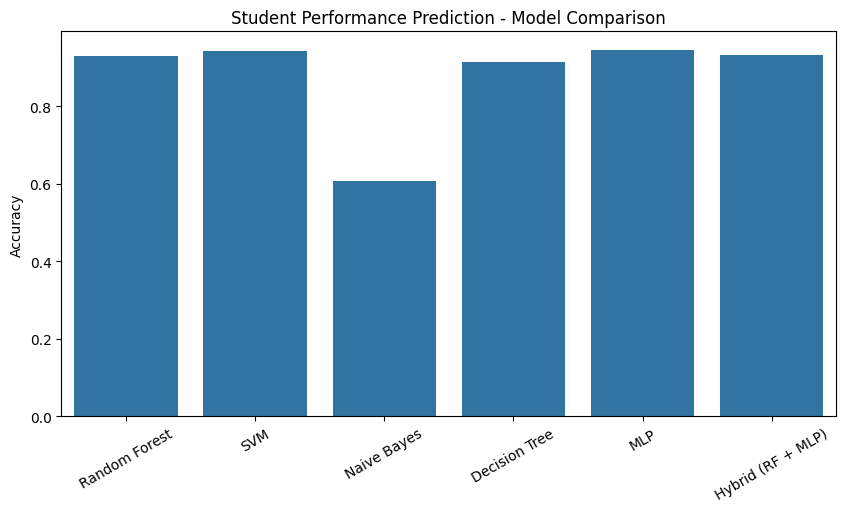

In [8]:
# -----------------------------------------
# STUDENT PERFORMANCE PREDICTION (UNIVERSAL)
# -----------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# -----------------------------------------
# 1. LOAD DATASET
# -----------------------------------------
data = pd.read_csv("StudentPerformance.csv")

print("\nDataset Columns:\n", list(data.columns))

# -----------------------------------------
# 2. AUTO TARGET DETECTION
# -----------------------------------------

# Possible performance columns
possible_targets = [
    "G3", "final_grade", "FinalGrade", "score", "Score",
    "performance", "Performance", "result", "Result"
]

target_col = None

for col in data.columns:
    if col in possible_targets or data[col].dtype != object:
        if data[col].nunique() > 5:
            target_col = col
            break

if target_col is None:
    raise Exception("❌ No suitable target column found in dataset")

print(f"\n✔ Selected Target Column: {target_col}")

# Convert target into Pass/Fail
data["Pass"] = data[target_col].apply(
    lambda x: 1 if x >= data[target_col].median() else 0
)

# Drop original target
data.drop(columns=[target_col], inplace=True)

# -----------------------------------------
# 3. PREPROCESSING
# -----------------------------------------

# Handle missing values
data.fillna(data.mode().iloc[0], inplace=True)

# Encode categorical features
cat_cols = data.select_dtypes(include="object").columns
for col in cat_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# Features & target
X = data.drop(columns=["Pass"])
y = data["Pass"]

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------------------
# 4. FEATURE SELECTION (RANDOM FOREST)
# -----------------------------------------
rf_fs = RandomForestClassifier(n_estimators=100, random_state=42)
rf_fs.fit(X_scaled, y)

importances = rf_fs.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

top_features = feat_imp.head(5).index
print("\nTop Selected Features:\n", feat_imp.head(5))

X_selected = X_scaled[:, [X.columns.get_loc(f) for f in top_features]]

# -----------------------------------------
# 5. TRAIN TEST SPLIT
# -----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# -----------------------------------------
# 6. MODELS
# -----------------------------------------
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# -----------------------------------------
# 7. HYBRID MODEL (RF + MLP)
# -----------------------------------------
rf_probs = models["Random Forest"].predict_proba(X_selected)[:, 1].reshape(-1, 1)
X_hybrid = np.hstack((X_selected, rf_probs))

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_hybrid, y, test_size=0.2, random_state=42
)

hybrid = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=500, random_state=42)
hybrid.fit(X_train_h, y_train_h)

y_pred_h = hybrid.predict(X_test_h)
hybrid_acc = accuracy_score(y_test_h, y_pred_h)

results["Hybrid (RF + MLP)"] = hybrid_acc
print(f"Hybrid Model Accuracy: {hybrid_acc:.4f}")

# -----------------------------------------
# 8. VISUAL COMPARISON
# -----------------------------------------
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Accuracy")
plt.title("Student Performance Prediction - Model Comparison")
plt.xticks(rotation=30)
plt.show()
